In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal 

Simulation Question 1. Each distribution has 200 data points that are concatenated in a two-dimensional array and given to you. Plot the data with three different colors in a graph.

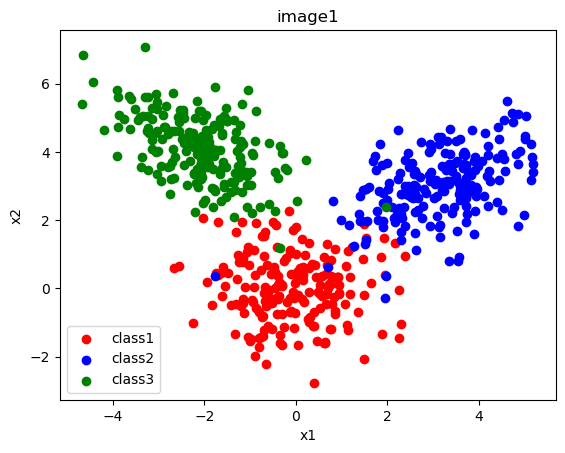

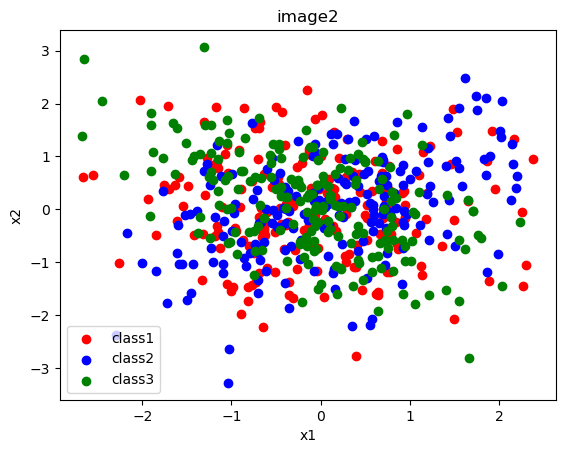

In [85]:
#plot data function
def plot_data(name):
    #read data
    data = pd.read_csv(name+'.csv',header=None)

    #split data into 3 arrays
    data1 = data.iloc[0:200,1:3]
    data2 = data.iloc[200:400,1:3]
    data3 = data.iloc[400:600,1:3]

    #convert to numpy array
    data1 = data1.to_numpy()
    data2 = data2.to_numpy()
    data3 = data3.to_numpy()

    #plot the data
    plt.scatter(data1[:,0],data1[:,1],color='red', label='class1')
    plt.scatter(data2[:,0],data2[:,1],color='blue', label='class2')
    plt.scatter(data3[:,0],data3[:,1],color='green', label='class3')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(name)
    plt.legend()
    plt.show()
plot_data('image1')
plot_data('image2')

Write a function that performs the E-step. This means assigning each data to a distribution based on the Euclidean distance. Return as output a 3 × 600 array specifying which distribution each data belongs to. If the Rij is one, it means that the i–th data is assigned to the j–th distribution. Run this function for one iteration and report the result.

C:\Users\Amirreza\AppData\Local\Temp\ipykernel_26736\3447760872.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z.pdf(pos), colors=colors[i], label='class'+str(i+1))


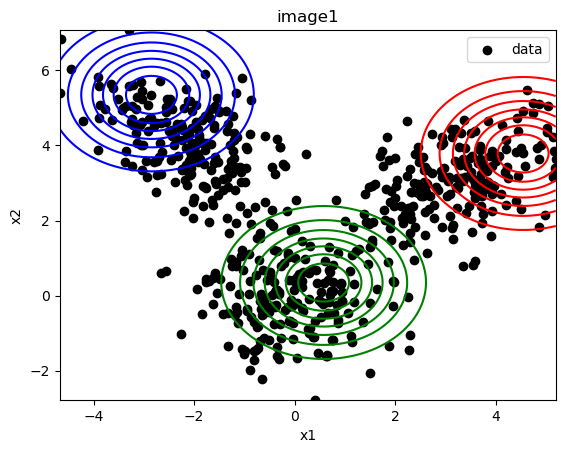

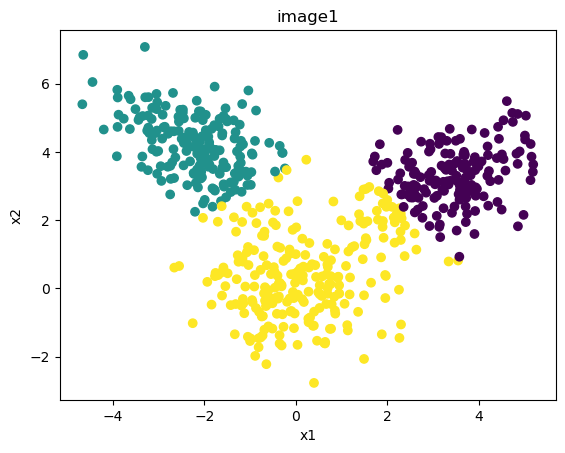

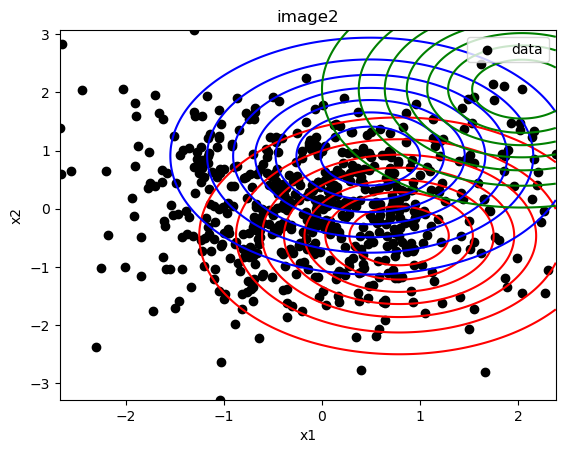

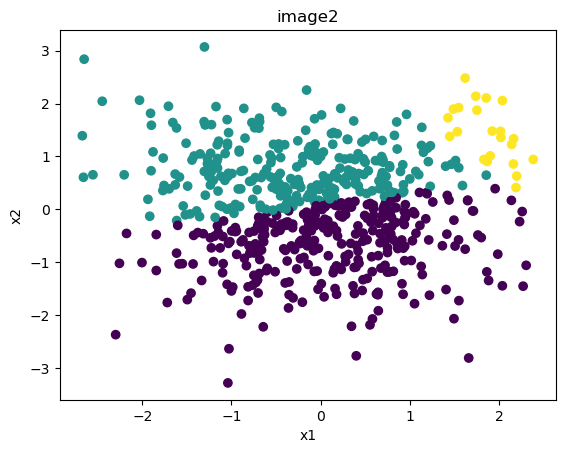

[[2.07973902e-01 7.32449024e-01 5.95770743e-02]
 [6.25125943e-01 3.42728797e-01 3.21452608e-02]
 [3.74019289e-01 6.04708885e-01 2.12718254e-02]
 ...
 [9.21503042e-01 7.83031795e-02 1.93778344e-04]
 [7.18304666e-02 8.96017684e-01 3.21518489e-02]
 [9.17208169e-01 8.21857649e-02 6.06065821e-04]]


In [87]:
#initialize parameters
def initialize(data, k):
    n = data.shape[0]
    d = data.shape[1]
    pi = np.ones(k)/k
    mu = data[np.random.randint(data.shape[0], size=k), :]
    cov = np.zeros((k,d,d))
    for i in range(k):
        cov[i] = np.eye(d)
    gamma = np.zeros((n,k))
    return pi, mu, cov, gamma

#E-Step algorithm
def E_step(data, mu, cov, pi,gamma):
    k = mu.shape[0]
    for j in range(k):
        gamma[:,j] = pi[j]*multivariate_normal(mu[j],cov[j]).pdf(data)
    gamma = gamma/gamma.sum(axis=1).reshape(-1,1)
    return gamma

#assign each data point to a class
def assign(data, mu, cov):
    k = mu.shape[0]
    n = data.shape[0]
    gamma = np.zeros((n,k))
    for j in range(k):
        gamma[:,j] = multivariate_normal(mu[j],cov[j]).pdf(data)
    gamma = gamma/gamma.sum(axis=1).reshape(-1,1)
    return gamma.argmax(axis=1), gamma

#plot the results
def plot(mu, cov, data,data_class, name):
    #scatter plot of distribution
    x1 = np.linspace(data[:,0].min(),data[:,0].max(),data.shape[0])
    x2 = np.linspace(data[:,1].min(),data[:,1].max(),data.shape[0])
    X, Y = np.meshgrid(x1,x2)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    k = mu.shape[0]
    colors = ['red','blue','green']
    for i in range(k):
        Z = multivariate_normal(mu[i],cov[i])
        plt.contour(X, Y, Z.pdf(pos), colors=colors[i], label='class'+str(i+1))
    plt.scatter(data[:,0],data[:,1],color='black', label='data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(name)
    plt.legend()
    plt.show()
    plt.scatter(data[:,0],data[:,1],c=data_class, cmap='viridis')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(name)
    plt.show()


#read data
data1 = pd.read_csv('image1.csv',header=None)
data2 = pd.read_csv('image2.csv',header=None)

#run E-Step algorithm
pi1, mu1, cov1, gamma1 = initialize(data1.iloc[:,1:3].to_numpy(), 3)
pi2, mu2, cov2, gamma2 = initialize(data2.iloc[:,1:3].to_numpy(), 3)

gamma1 = E_step(data1.iloc[:,1:3].to_numpy(), mu1, cov1, pi1,gamma1)
gamma2 = E_step(data2.iloc[:,1:3].to_numpy(), mu2, cov2, pi2,gamma2)



#assign each data point to a class
data1_class , R = assign(data1.iloc[:,1:3].to_numpy(), mu1, cov1)
data2_class , R = assign(data2.iloc[:,1:3].to_numpy(), mu2, cov2)

plot(mu1, cov1, data1.iloc[:,1:3].to_numpy(),data1_class, 'image1')
plot(mu2, cov2, data2.iloc[:,1:3].to_numpy(),data2_class, 'image2')

#set 1 to max of R's row
R = R == R.max(axis=1)[:,None]
print(R)

Write a function that performs M-step. This means updating the mean and variance of each distribution. Run this function for one iteration and report the new variances and means of each distribution.

In [88]:
#M-step algorithm
def M_step(data, gamma,mu,cov,pi):
    k = gamma.shape[1]
    n = data.shape[0]
    for j in range(k):
        mu[j] = gamma[:,j].dot(data)/gamma[:,j].sum()
        cov[j] = (gamma[:,j]*(data-mu[j]).T).dot(data-mu[j])/gamma[:,j].sum()
        pi[j] = gamma[:,j].sum()/n
    return mu, cov, pi

#M-step
mu1, cov1, pi1 = M_step(data1.iloc[:,1:3], gamma1,mu1,cov1,pi1)
mu2, cov2, pi2 = M_step(data2.iloc[:,1:3], gamma2,mu2,cov2,pi2)

#print mean and covariance
print('mu1 = ', mu1)
print('-'*50)
print('cov1 = ', cov1)
print('-'*50)
print('mu2 = ', mu2)
print('-'*50)
print('cov2 = ', cov2)




mu1 =  [[ 3.43903826  3.29343967]
 [-2.21791246  4.24229046]
 [ 0.17863488  0.47468538]]
--------------------------------------------------
cov1 =  [[[ 0.74151108  0.18163125]
  [ 0.18163125  0.66211306]]

 [[ 0.77000122 -0.31599538]
  [-0.31599538  0.7418655 ]]

 [[ 1.47235098  0.33222876]
  [ 0.33222876  1.62536247]]]
--------------------------------------------------
mu2 =  [[ 0.03666208 -0.45623718]
 [-0.24163723  0.45758897]
 [ 1.1539046   1.10181962]]
--------------------------------------------------
cov2 =  [[[ 0.83975958  0.01569601]
  [ 0.01569601  0.70144168]]

 [[ 0.90433411 -0.09228345]
  [-0.09228345  0.64408574]]

 [[ 0.73046342  0.07591897]
  [ 0.07591897  0.49864612]]]


Using the functions you have written, run the EM algorithm until a convergence is reached or the maximum number of steps is passed. Replot the three new distributions and compare with the correct labels.

log_likelihood for image1 stopped changing at iteration 38


C:\Users\Amirreza\AppData\Local\Temp\ipykernel_26736\3447760872.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z.pdf(pos), colors=colors[i], label='class'+str(i+1))


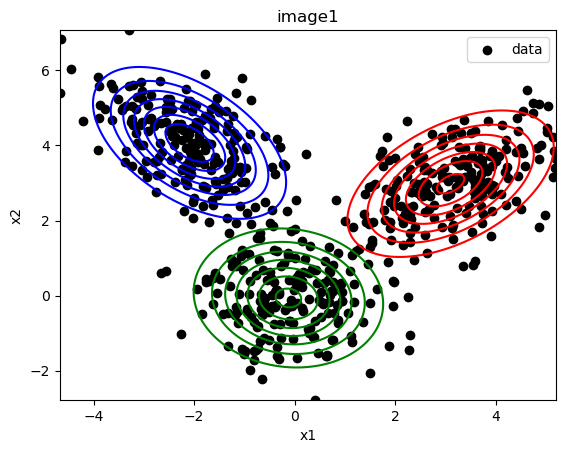

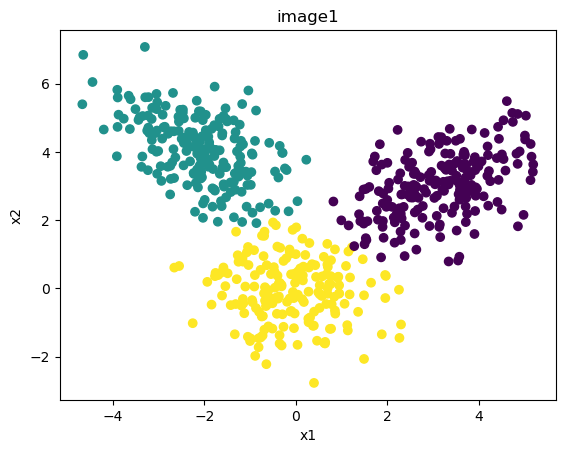

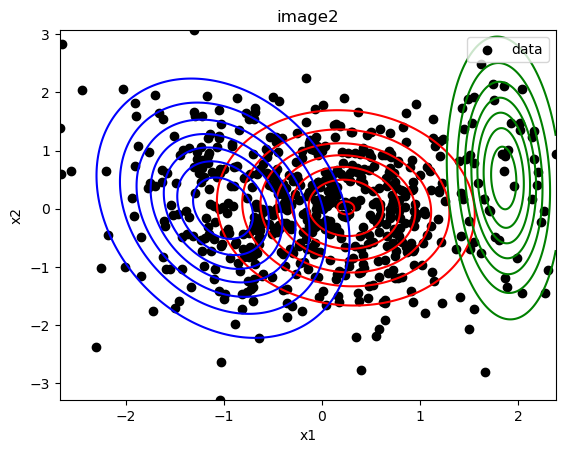

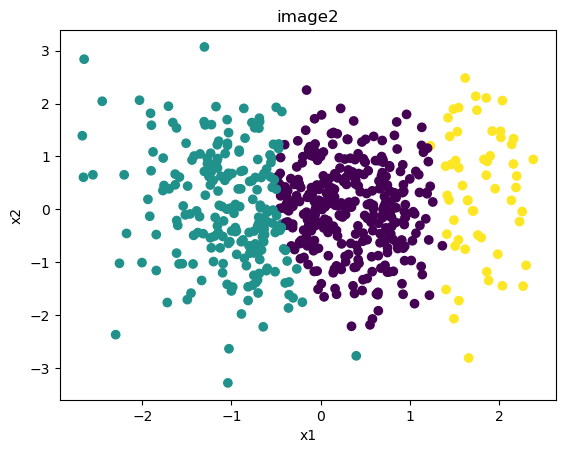

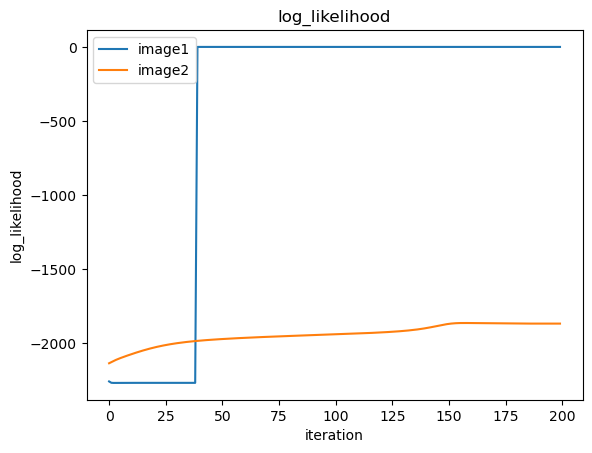

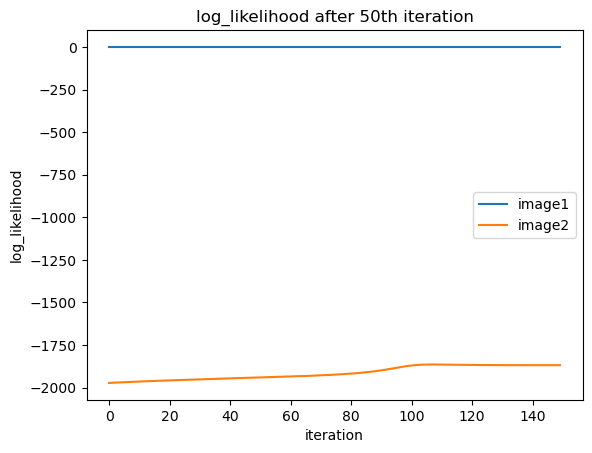

In [98]:
def EM(name,data, k, max_iter):
    #initialization
    n = data.shape[0]
    d = data.shape[1]
    pi, mu, cov, gamma = initialize(data, k)
    for i in range(k):
        cov[i] = np.eye(d)
    gamma = np.zeros((n,k))
    log_likelihood = np.zeros(max_iter)
    #stop for loop when log_likelihood is not changing or max_iter is reached
    for i in range(max_iter):
        #E-step
        gamma = E_step(data, mu, cov, pi,gamma)
        #M-step
        mu, cov, pi = M_step(data, gamma,mu,cov,pi)
        #compute log_likelihood
        log_likelihood[i] = 0
        for j in range(k):
            log_likelihood[i] += np.log(pi[j])*gamma[:,j].sum()
            log_likelihood[i] += gamma[:,j].dot(np.log(multivariate_normal(mu[j],cov[j]).pdf(data)))
        #stop for loop when log_likelihood is not changing or max_iter is reached
        if i > 0:
            if np.abs(log_likelihood[i]-log_likelihood[i-1]) < 1e-7:
                print('log_likelihood for',name,'stopped changing at iteration',i)
                break

    return mu, cov, pi, log_likelihood

#run EM algorithm
mu1, cov1, pi1, log_likelihood1 = EM('image1',data1.iloc[:,1:3].to_numpy(), 3, 200)
mu2, cov2, pi2, log_likelihood2 = EM('image2',data2.iloc[:,1:3].to_numpy(), 3, 200)

#assign each data point to a class
data1_class , R = assign(data1.iloc[:,1:3].to_numpy(), mu1, cov1)
data2_class , R = assign(data2.iloc[:,1:3].to_numpy(), mu2, cov2)

plot(mu1, cov1, data1.iloc[:,1:3].to_numpy(),data1_class, 'image1')
plot(mu2, cov2, data2.iloc[:,1:3].to_numpy(),data2_class, 'image2')

#plot log_likelihood
plt.plot(log_likelihood1, label='image1')
plt.plot(log_likelihood2, label='image2')
plt.xlabel('iteration')
plt.ylabel('log_likelihood')
plt.title('log_likelihood')
plt.legend()
plt.show()

#plot log_likelihood after 50th iteration
plt.plot(log_likelihood1[50:], label='image1')
plt.plot(log_likelihood2[50:], label='image2')
plt.xlabel('iteration')
plt.ylabel('log_likelihood')
plt.title('log_likelihood after 50th iteration')
plt.legend()
plt.show()
